In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['convolve']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Aggregációs feladat
Aggregációs függvény: $A_y = \sum_n y[n]$

$A_y = A_h\cdot A_x$, ha $y[n] = h[n]*x[n]$.

In [6]:
from scipy.signal import convolve

n = array([0,1, 2, 3, 4])
dt = 1/100
x = sin(2*pi*n*dt)+ 0.5*rand(5)
h = array([1,1,1, 1, 1])

In [7]:
def conv(x, a):
    y=zeros(2*len(x)-1)
    h = zeros(2*len(x)-1)
    for i in range(len(x)):
        h[i]=a[i]
    for n in range(2*len(x)-1):
        for k in range(len(x)):
            y[n]= y[n]+x[k]*h[n-k]
    return y

In [8]:
def Agg(x, n):
    sum = 0
    for i in range(len(n)):
        sum = sum + x[i]
    return sum

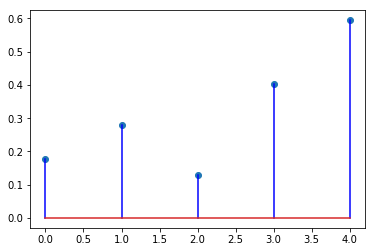

In [9]:
markerline, stemlines, baseline = stem(n,x,linefmt='b')
show()

In [10]:
y = convolve(x, h)
q = conv(x, h)
print(y)
print(q)
print(Agg(y,y))

print(Agg(x,x)*Agg(h,h))

[ 0.17808624  0.45746459  0.58533864  0.98863353  1.58332297  1.40523673
  1.12585838  0.99798433  0.59468944]
[ 0.17808624  0.45746459  0.58533864  0.98863353  1.58332297  1.40523673
  1.12585838  0.99798433  0.59468944]
7.9166148498
7.9166148498


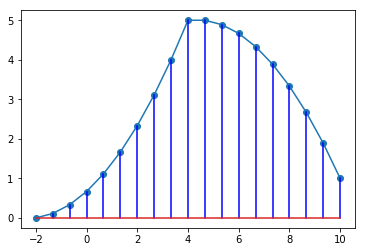

In [19]:

x = linspace(0,3, 10)
h = linspace(-1, 1, 10)
h = h/h
x= x/3

q = conv(x,h)
w = linspace(-2,10, len(q) )
plot(w, q)
markerline, stemlines, baseline = stem(w,q,linefmt='b')
show()

# Konvoluciós mátrix

[[ 1.      0.      0.    ]
 [ 0.5     1.      0.    ]
 [ 0.25    0.5     1.    ]
 [ 0.125   0.25    0.5   ]
 [ 0.0625  0.125   0.25  ]
 [ 0.      0.0625  0.125 ]
 [ 0.      0.      0.0625]]
[ 0.33333333  0.27777778  0.17592593  0.08796296  0.04398148  0.01157407
  0.00231481]
(3,) (7, 3)


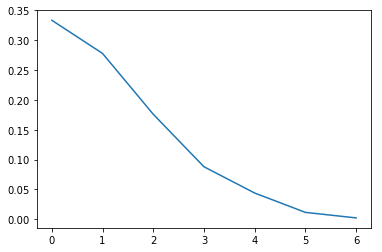

In [13]:
from scipy.linalg import *
n = array([1, 1/2, 1/4, 1/8, 1/16])
h = array([1/3, 1/9, 1/27])

def matconv(x, h):
    padding = np.zeros(h.shape[0] - 1, h.dtype)
    first_col = np.r_[x, padding]
    first_row = np.r_[x[0], padding]
    H = toeplitz(first_col, first_row)
    return H

xn = (matconv(n, h))
k = matmul(xn, h)
print(matconv(n,h))
print(k)
print(shape(h), shape(xn))
plot(k)

Az eredmény megegyezik a *numpy* konvoluciós függvény által adottal:

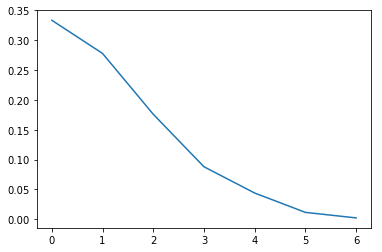

In [14]:
q = convolve(n, h)
plot(q)

# Korrelációs függvény

Korellációt egyszerű számolni, mert használhatjuk a konvoluciós függvényt, csak meg kell fordítani a súlyfüggvényt.

[ 0.03703704  0.12962963  0.39814815  0.19907407  0.09953704  0.04861111
  0.02083333]


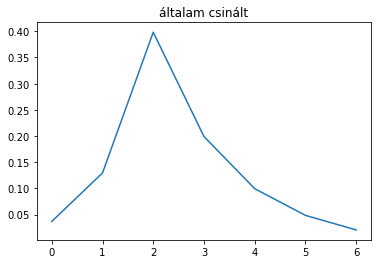

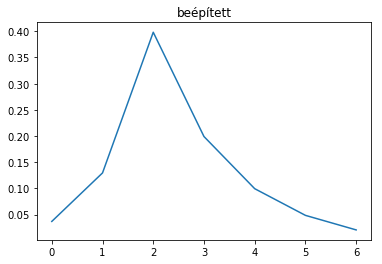

In [16]:
def cor(n, h):
    h = flipud(h)
    return matmul(matconv(n,h),h)
print(cor(n, h))
title("általam csinált")
plot(cor(n, h))
show()
title("beépített")
plot(correlate(n, h, mode = 'full'))
show()

# Egyszerű szűrő

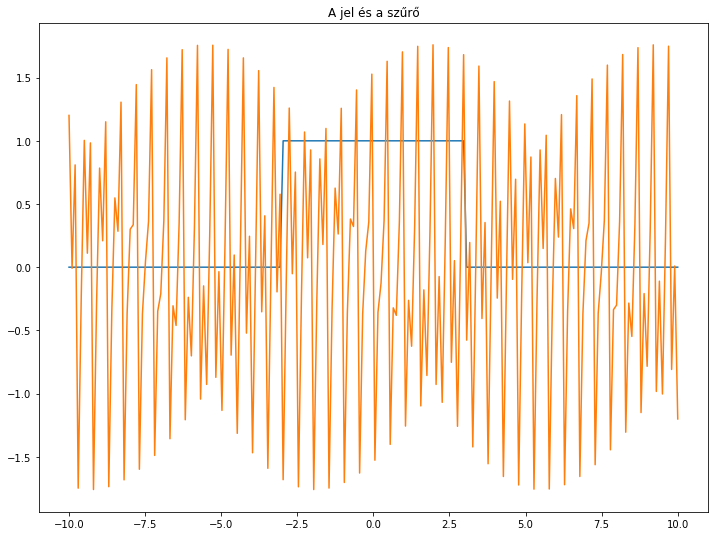

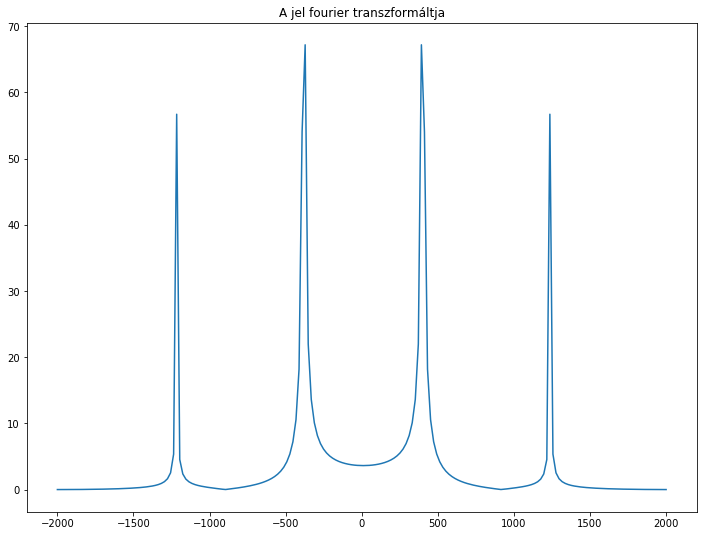

In [38]:
x = linspace(-10, 10, 200)
y = linspace(-10,10, 200)*200
felul = (heaviside(x-3, 1)-heaviside(x+3, 1)+1)
alul = -felul+1
szuro = alul
plot(x, szuro)
f = 3
s = sin(f*y)+sin(2*f*y)
title("A jel és a szűrő")
plot(x,s)
show()
it = real(fft.fft(s))
title("A jel fourier transzformáltja")
plot(y, abs(it))
show()

A szűrt jel, még frekvenciatérben:

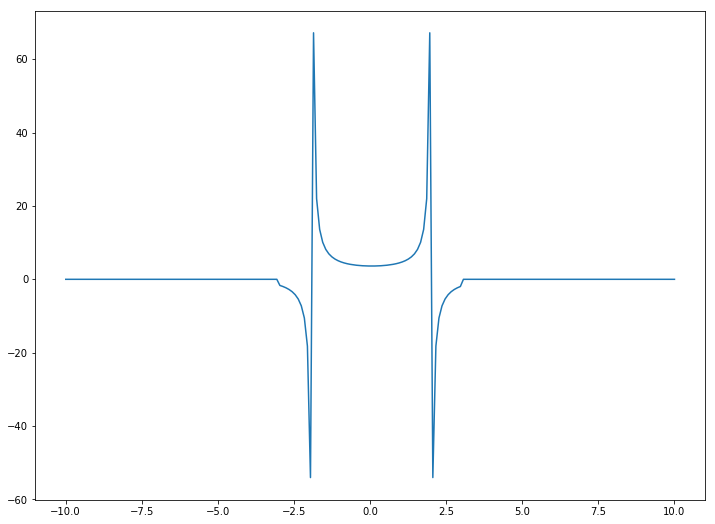

In [39]:
szurt = it*szuro
plot(x, szurt)

A jel visszatranszformálva:

/opt/conda/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


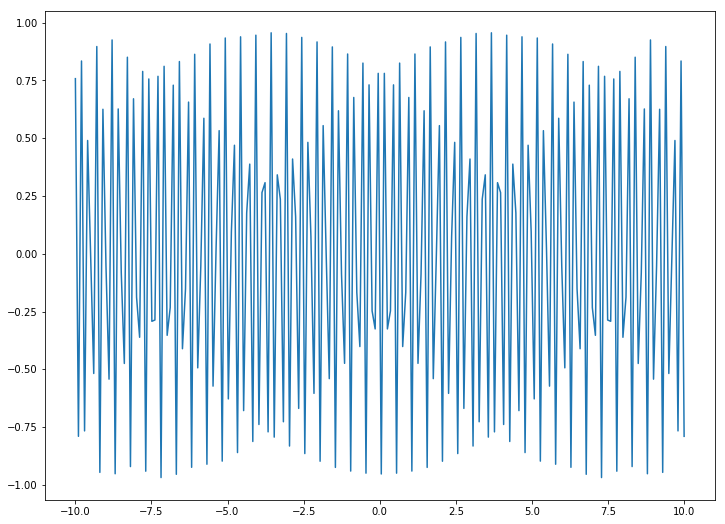

In [40]:
v = fft.ifft(szurt)
plot(x, v)
show()

Ilyen volt a bejövő:

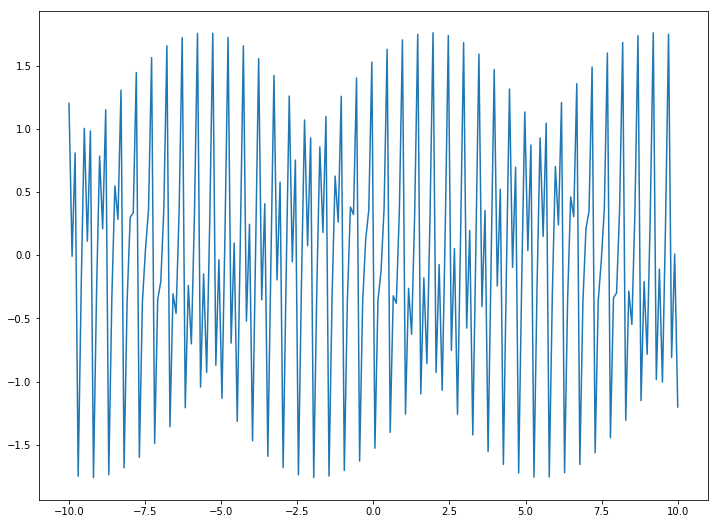

In [41]:
plot(x, s)
show()

/opt/conda/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


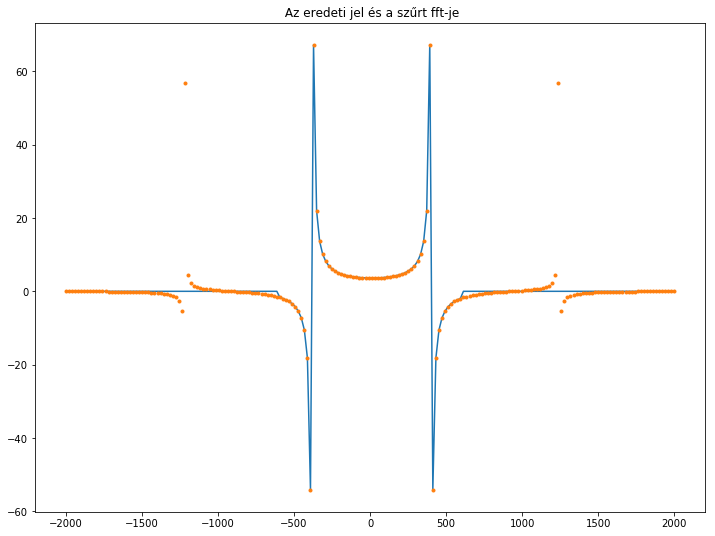

In [42]:
figsize(12,9)
title(" Az eredeti jel és a szűrt fft-je")
plot(y, fft.fft(v), y, fft.fft(s), ".")
show()

Látható, hogy a szűrt jelnek eltüntek bizonyos csúcsai.